<a href="https://colab.research.google.com/github/coderhouse2025-droid/Miami-Heat/blob/main/Miami_Heat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

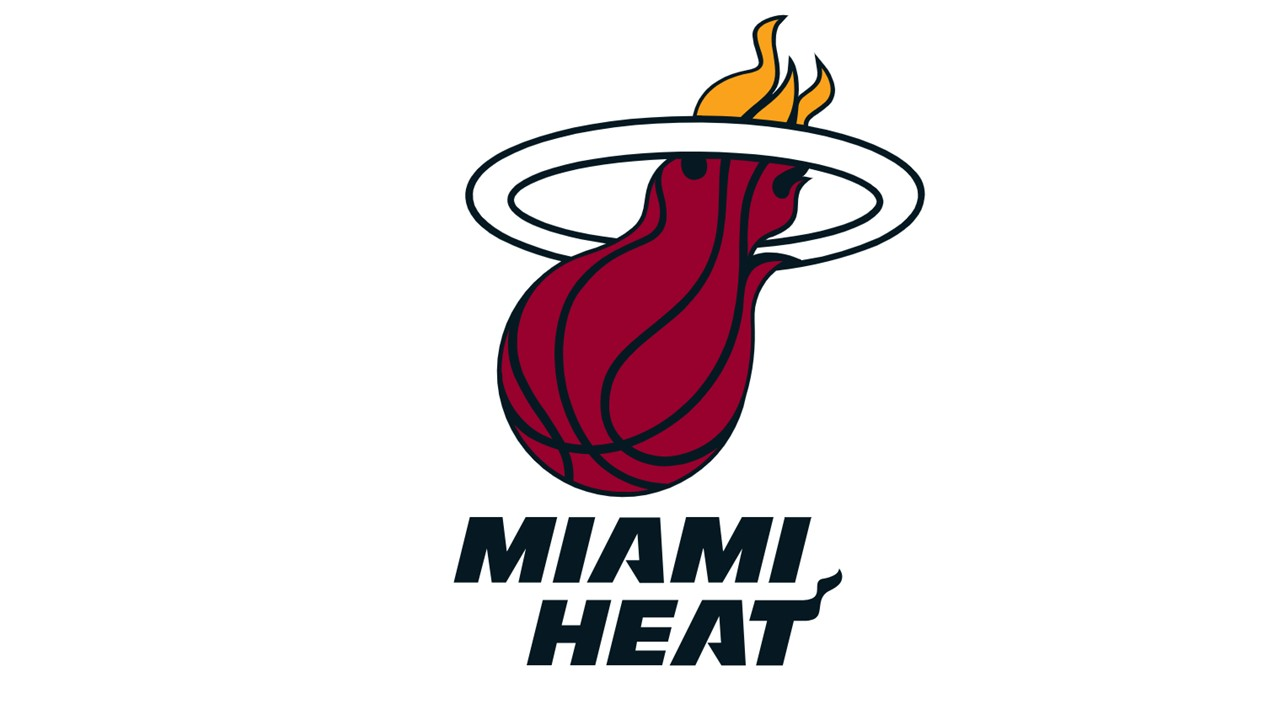

**ABSTRACT**

Análisis de Desempeño de Miami Heat (2019-2024)
El Dataset seleccionado para este análisis comprende el historial de partidos de la franquicia Miami Heat obtenido en la Paginas: www.basketball reference.com y “Universo Basquet.com”, abarcando cinco temporadas completas desde 2019 hasta 2024. Este registro detalla el rendimiento del equipo en diversas condiciones, permitiendo un estudio exhaustivo de las victorias y derrotas segmentadas por temporada, condición (local/visitante), los puntos fuertes y debiles y Net Rating.


**Montar Google Drive en este entorno de Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Instalar gdown**

(herramienta diseñada para facilitar la descarga de
archivos de Google Drive a través de comandos de línea de comandos).




In [ ]:
!pip install -q gdown

**Descargar la base de datos Miami Heat desde Google Drive**

In [ ]:
import gdown

gdown.download(id='1jFlyloLJwcn_3KvbaDEFEwTwlFWJM_MV', output='Miami_Heat_Database.xlsx', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1jFlyloLJwcn_3KvbaDEFEwTwlFWJM_MV
To: /content/Miami_Heat_Database.xlsx
100%|██████████| 59.1k/59.1k [00:00<00:00, 42.3MB/s]


'Miami_Heat_Database.xlsx'

**Importar Pandas**

(biblioteca de código abierto diseñada para facilitar el análisis y manipulación de datos en Python)

In [ ]:
import pandas as pd

df = pd.read_excel('Miami_Heat_Database.xlsx')
display(df.head())

,Equipo,Temporada,Fase,Jugadores,Edad,Partidos jugados,Partidos como titular,Minutos jugados,Tiros de campo anotados,Tiros de campo intentados,...,Rebotes defensivos,Rebotes totales,Asistencias,Robos,Tapones / Bloqueos,Pérdidas de balón,Faltas personales,Puntos,Triples-dobles,Premios
0,Miami Heat,2019 - 2020,Regular,Bam Adebayo,22,72,72,2417,440,790,...,559,735,368,82,93,204,182,1146,3,DPOY-5(Quinto en la votación al Jugador Defens...
1,Miami Heat,2019 - 2020,Regular,Duncan Robinson,25,73,68,2166,323,687,...,222,232,102,35,19,70,193,983,0,-
2,Miami Heat,2019 - 2020,Regular,Kendrick Nunn,24,67,67,1962,401,914,...,159,180,220,56,15,114,152,1024,0,ROY-2(Segundo en la votación al Novato del Año)
3,Miami Heat,2019 - 2020,Regular,Jimmy Butler,30,58,58,1959,345,758,...,280,386,350,103,32,127,81,1157,3,"MVP-11,AS (Undécimo en la votación al MVP),NBA..."
4,Miami Heat,2019 - 2020,Regular,Goran Dragić,33,59,3,1663,319,724,...,158,187,301,40,10,144,124,953,0,6MOY-6 (Sexto en la votación al Sexto Hombre d...


**Importar Squite3**

(Sistema de gestión de bases de datos relacional ligero, autónomo y sin servidor, ideal para aplicaciones que requieren almacenamiento local de datos)

In [ ]:
import sqlite3

**Conectar con el archivo**

In [ ]:
database_name = 'miami_heat.db'
conn = sqlite3.connect(database_name)
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print("Tablas encontradas:", tables['name'].tolist())

Tablas encontradas: ['miami_heat_data']


**Ejecutar la celda para listar las tablas de la base de datos miami_heat.db**

In [ ]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print("Tablas encontradas:", tables['name'].tolist())

Tablas encontradas: ['miami_heat_data']


**Creacion de un nuevo archivo**

("miami_heat_data": Este es el nombre de la tabla específica dentro de la base de datos miami_heat.db. Donde se guarda el DataFrame df).

In [ ]:
df.to_sql('miami_heat_data', conn, if_exists='replace', index=False)
print("DataFrame 'df' guardado en la tabla 'miami_heat_data' de la base de datos SQLite.")

DataFrame 'df' guardado en la tabla 'miami_heat_data' de la base de datos SQLite.


**Carga de cada hoja (solapa) del archivo Excel "Miami_Heat_Database.xlsx"**

en un DataFrame separado y luego se combinan en un solo DataFrame. Además, agregue una columna para identificar de qué hoja proviene cada registro.

In [ ]:
xls = pd.ExcelFile('Miami_Heat_Database.xlsx')
sheet_names = xls.sheet_names

# Crear una lista para almacenar los DataFrames de cada hoja
all_dfs = []

for sheet_name in sheet_names:
    df_sheet = pd.read_excel('Miami_Heat_Database.xlsx', sheet_name=sheet_name)
    df_sheet['Fase_Original'] = sheet_name  # Añadir una columna para identificar la hoja de origen
    all_dfs.append(df_sheet)

# Concatenar todos los DataFrames en uno solo
df_combined = pd.concat(all_dfs, ignore_index=True)

print(f"Se han cargado y combinado {len(sheet_names)} hojas en un solo DataFrame.")
print("Primeras 5 filas del DataFrame combinado:")
display(df_combined.head())
print("Información del DataFrame combinado:")
display(df_combined.info())

Se han cargado y combinado 3 hojas en un solo DataFrame.
Primeras 5 filas del DataFrame combinado:


,Equipo,Temporada,Fase,Jugadores,Edad,Partidos jugados,Partidos como titular,Minutos jugados,Tiros de campo anotados,Tiros de campo intentados,...,Pérdidas de balón,Faltas personales,Puntos,Triples-dobles,Premios,Fase_Original,Equipo,Condición,Oponente,Resultado
0,Miami Heat,2019 - 2020,Regular,Bam Adebayo,22.0,72.0,72.0,2417.0,440.0,790.0,...,204.0,182.0,1146.0,3.0,DPOY-5(Quinto en la votación al Jugador Defens...,REGULAR,NaN,NaN,NaN,NaN
1,Miami Heat,2019 - 2020,Regular,Duncan Robinson,25.0,73.0,68.0,2166.0,323.0,687.0,...,70.0,193.0,983.0,0.0,-,REGULAR,NaN,NaN,NaN,NaN
2,Miami Heat,2019 - 2020,Regular,Kendrick Nunn,24.0,67.0,67.0,1962.0,401.0,914.0,...,114.0,152.0,1024.0,0.0,ROY-2(Segundo en la votación al Novato del Año),REGULAR,NaN,NaN,NaN,NaN
3,Miami Heat,2019 - 2020,Regular,Jimmy Butler,30.0,58.0,58.0,1959.0,345.0,758.0,...,127.0,81.0,1157.0,3.0,"MVP-11,AS (Undécimo en la votación al MVP),NBA...",REGULAR,NaN,NaN,NaN,NaN
4,Miami Heat,2019 - 2020,Regular,Goran Dragić,33.0,59.0,3.0,1663.0,319.0,724.0,...,144.0,124.0,953.0,0.0,6MOY-6 (Sexto en la votación al Sexto Hombre d...,REGULAR,NaN,NaN,NaN,NaN


Información del DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0    Equipo                    173 non-null    object 
 1   Temporada                  563 non-null    object 
 2   Fase                       173 non-null    object 
 3   Jugadores                  173 non-null    object 
 4   Edad                       173 non-null    float64
 5   Partidos jugados           173 non-null    float64
 6   Partidos como titular      173 non-null    float64
 7   Minutos jugados            173 non-null    float64
 8   Tiros de campo anotados    173 non-null    float64
 9   Tiros de campo intentados  173 non-null    float64
 10  % de tiros de campo        173 non-null    float64
 11  Triples anotados           173 non-null    float64
 12  Triples intentados         173 non-null    float64
 13  % de triples 

None

# **Data Clearing**

**Verificación y eliminación de las filas duplicadas del DataFrame "df_combined"**

In [ ]:
print(f"Filas duplicadas en df_combined antes de la eliminación: {df_combined.duplicated().sum()}")
df_combined.drop_duplicates(inplace=True)
print(f"Filas en df_combined después de la eliminación de duplicados: {df_combined.shape[0]}")

Filas duplicadas en df_combined antes de la eliminación: 0
Filas en df_combined después de la eliminación de duplicados: 511


**Renombrado de las columnas, eliminando los espacios iniciales/finales de todos los nombres de columna en "df_combined" para asegurar la consistencia.**

In [ ]:
print('Columnas antes de la limpieza:', df_combined.columns.tolist())
df_combined.columns = df_combined.columns.str.strip()
print('Columnas después de la limpieza:', df_combined.columns.tolist())

Columnas antes de la limpieza: ['Equipo', 'Temporada', 'Fase', 'Jugadores', 'Edad', 'Partidos jugados', 'Partidos como titular', 'Minutos jugados', 'Tiros de campo anotados', 'Tiros de campo intentados', '% de tiros de campo', 'Triples anotados', 'Triples intentados', '% de triples', 'Dobles anotados', 'Dobles intentados', '% de dobles', '% de tiro efectivo', 'Tiros libres anotados', 'Tiros libres intentados', '% de tiros libres', 'Rebotes ofensivos', 'Rebotes defensivos', 'Rebotes totales', 'Asistencias', 'Robos', 'Tapones / Bloqueos', 'Pérdidas de balón', 'Faltas personales', 'Puntos', 'Triples-dobles', 'Premios', 'Fase_Original', 'Equipo', 'Condición', 'Oponente', 'Resultado']
Columnas después de la limpieza: ['Equipo', 'Temporada', 'Fase', 'Jugadores', 'Edad', 'Partidos jugados', 'Partidos como titular', 'Minutos jugados', 'Tiros de campo anotados', 'Tiros de campo intentados', '% de tiros de campo', 'Triples anotados', 'Triples intentados', '% de triples', 'Dobles anotados', 'Dobl

**Consolidar Columna "Equipo"**

Combinación de las dos columnas relacionadas con "Equipo" (originadas de las diferentes hojas del Excel) en una única columna 'Equipo' para eliminar "NaN" y tener una representación unificada.


In [ ]:
print("Columnas originales de 'Equipo' (primeras 5 filas) antes de la consolidación:")
display(df_combined.loc[:, df_combined.columns == 'Equipo'].head())

# Identificar las dos columnas 'Equipo' por su posición (índices 0 y 33)
# La primera columna 'Equipo' es df_combined.iloc[:, 0]
# La segunda columna 'Equipo' es df_combined.iloc[:, 33]

# Consolidar las dos columnas 'Equipo' en una nueva columna 'Equipo_consolidado'.
# Utilizaremos fillna para rellenar los NaN de la primera columna con los valores de la segunda.
df_combined['Equipo_consolidado'] = df_combined.iloc[:, 0].fillna(df_combined.iloc[:, 33])

# Eliminar las columnas originales de 'Equipo' usando sus índices enteros.
# Esto es más seguro cuando hay nombres de columnas duplicados.
df_combined.drop(df_combined.columns[[0, 33]], axis=1, inplace=True)

# Renombrar la nueva columna 'Equipo_consolidado' a 'Equipo'.
df_combined.rename(columns={'Equipo_consolidado': 'Equipo'}, inplace=True)

# Verificar la consolidación
print("\nPrimeras 5 filas del DataFrame con la columna 'Equipo' consolidada:")
display(df_combined[['Equipo', 'Temporada', 'Fase_Original']].head())

print("\nConteo de valores no nulos en la columna 'Equipo' consolidada:")
print(df_combined['Equipo'].count())

print("\nValores únicos en la columna 'Equipo' consolidada:")
print(df_combined['Equipo'].unique())

print("\nInformación del DataFrame después de la consolidación de la columna 'Equipo':")
df_combined.info()

Columnas originales de 'Equipo' (primeras 5 filas) antes de la consolidación:


,Equipo,Equipo
0,Miami Heat,NaN
1,Miami Heat,NaN
2,Miami Heat,NaN
3,Miami Heat,NaN
4,Miami Heat,NaN



Primeras 5 filas del DataFrame con la columna 'Equipo' consolidada:


,Equipo,Temporada,Fase_Original
0,Miami Heat,2019-2020,REGULAR
1,Miami Heat,2019-2020,REGULAR
2,Miami Heat,2019-2020,REGULAR
3,Miami Heat,2019-2020,REGULAR
4,Miami Heat,2019-2020,REGULAR



Conteo de valores no nulos en la columna 'Equipo' consolidada:
511

Valores únicos en la columna 'Equipo' consolidada:
['Miami Heat']
Categories (1, object): ['Miami Heat']

Información del DataFrame después de la consolidación de la columna 'Equipo':
<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 561
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Temporada                  511 non-null    category
 1   Fase                       173 non-null    category
 2   Jugadores                  173 non-null    category
 3   Edad                       173 non-null    float64 
 4   Partidos jugados           173 non-null    float64 
 5   Partidos como titular      173 non-null    float64 
 6   Minutos jugados            173 non-null    float64 
 7   Tiros de campo anotados    173 non-null    float64 
 8   Tiros de campo intentados  173 non-null    float64 
 9   % de tiros de c

**Estandarizacion de la Columna "Temporada"**

Asegurando que el formato de los valores en la columna "Temporada" sea consistente (por ejemplo, "AAAA-AAAA") eliminando espacios alrededor del guion y convirtiéndola a tipo categórico.

In [ ]:
print("Valores únicos de 'Temporada' antes de la estandarización:")
display(df_combined['Temporada'].unique())

# Eliminar espacios alrededor del guion y estandarizar la columna 'Temporada'
df_combined['Temporada'] = df_combined['Temporada'].str.replace(r'\s*-\s*', '-', regex=True)

# Convertir la columna 'Temporada' a tipo categórico
df_combined['Temporada'] = df_combined['Temporada'].astype('category')

# Verificar la estandarización
print("\nValores únicos de 'Temporada' después de la estandarización:")
display(df_combined['Temporada'].unique())
print("Tipo de dato de la columna 'Temporada':", df_combined['Temporada'].dtype)

Valores únicos de 'Temporada' antes de la estandarización:


['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']
Categories (5, object): ['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']


Valores únicos de 'Temporada' después de la estandarización:


['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']
Categories (5, object): ['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']

Tipo de dato de la columna 'Temporada': category


**Convertir Columnas Categóricas**

Identificación de las columnas de tipo "object" restantes que representen categorías y convertir a tipo "category" para optimizar el uso de memoria y mejorar el rendimiento.

In [ ]:
print("Tipos de datos actuales de df_combined antes de la conversión:")
df_combined.info()

Tipos de datos actuales de df_combined antes de la conversión:
<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 561
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Temporada                  511 non-null    category
 1   Fase                       173 non-null    category
 2   Jugadores                  173 non-null    category
 3   Edad                       173 non-null    float64 
 4   Partidos jugados           173 non-null    float64 
 5   Partidos como titular      173 non-null    float64 
 6   Minutos jugados            173 non-null    float64 
 7   Tiros de campo anotados    173 non-null    float64 
 8   Tiros de campo intentados  173 non-null    float64 
 9   % de tiros de campo        173 non-null    float64 
 10  Triples anotados           173 non-null    float64 
 11  Triples intentados         173 non-null    float64 
 12  % de triples               173 non

**Tarea Realizada**

*   Estandarización del nombre de las columnas: Una revisión inicial confirmó que todos los nombres de las columnas en el DataFrame "df_combined" ya estaban limpios, sin espacios iniciales ni finales. Por lo tanto, no se aplicaron modificaciones en este paso.
*   Consolidación de la columna "Equipo": Dos columnas distintas llamadas "Equipo", identificadas por sus índices enteros (0 y 33), se consolidaron con éxito en una única columna "Equipo". Este proceso implicó rellenar los valores "NaN" de una columna con los valores no nulos de la otra. La columna "Equipo" consolidada ahora contiene 511 entradas no nulas y solo un valor único, "Miami Heat", lo que confirma una representación unificada.
*   Estandarización de la columna "Temporada": La columna "Temporada" ya mantenía un formato consistente "AAAA-AAAA", lo que significa que no se requirieron modificaciones de cadena. Se convirtió con éxito a un tipo de datos "category", optimizando el uso de la memoria.
*   Conversión de columnas categóricas: Una revisión de los tipos de datos reveló que todas las columnas que normalmente se considerarían para la conversión de "object" a "category" (incluidas "Temporada", "Fase", "Jugadores", "Premios", "Fase_Original", "Condición", "Oponente", "Resultado" y "Equipo") ya estaban configuradas con el tipo de datos "category". Esto indicó que los pasos de procesamiento anteriores ya habían optimizado estas columnas, lo que hacía innecesarias futuras conversiones.


